<h1><center>Marketing Analytics EDA task</center></h1>
<p align="center">
  <img width="500" src="https://m2tech.buyit.vn/wp-content/uploads/2021/09/phan-tich-marketing-la-gi.jpg" alt="Material Bread logo">
</p>

### Introduction
This notebook will accomplish the following task:

### Overall goal:

You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

### Section 01: Exploratory Data Analysis
Are there any null values or outliers? How will you wrangle/handle them?

Are there any variables that warrant transformations?

Are there any useful variables that you can engineer with the given data?

Do you notice any patterns or anomalies in the data? Can you plot them?
### Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

What factors are significantly related to the number of store purchases?

Does US fare significantly better than the Rest of the World in terms of total purchases?

Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? 

What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)

Is there a significant relationship between geographical regional and success of a campaign?
### Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

Which marketing campaign is most successful?

What does the average customer look like for this company?

Which products are performing best?

Which channels are underperforming?

In [1]:
import pandas as pd
import matplotlib.pyplot as  plt
import numpy as np
import os
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [2]:
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("C:\\Users\\ddtha\\Downloads\\Marketing_Data.csv")

In [4]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1639,7247,1960,Graduation,Widow,"$47,916.00",0,1,11/22/2012,72,505,0,26,0,0,75,5,7,4,6,6,0,1,0,0,0,0,0,GER
351,6878,1954,Graduation,Widow,"$27,421.00",0,0,12/12/2012,14,43,12,96,78,40,55,3,4,1,6,7,0,0,0,0,0,0,0,SP
32,5824,1972,PhD,Together,"$34,578.00",2,1,4/11/2014,1,7,0,1,0,0,0,1,1,0,2,6,0,0,0,0,0,0,0,AUS
1262,531,1954,PhD,Divorced,"$57,333.00",0,1,9/22/2012,55,941,14,397,76,58,176,11,8,5,9,6,0,0,0,0,0,1,0,SP
479,9150,1963,PhD,Single,"$48,918.00",1,1,4/12/2014,21,52,0,9,0,0,1,2,1,0,4,4,0,0,0,0,0,0,0,SP
773,4216,1981,Graduation,Single,"$91,065.00",0,0,2/22/2013,33,822,114,108,179,137,114,1,7,9,9,3,0,0,1,1,0,1,0,SP
1602,3386,1992,Graduation,Married,"$34,935.00",0,0,6/21/2013,71,34,4,66,3,10,20,1,2,1,4,7,0,0,0,0,0,0,0,SP
656,626,1951,Graduation,Married,"$32,871.00",1,1,3/9/2013,28,22,2,12,0,2,5,1,1,0,3,4,0,0,0,0,0,0,0,US
1230,5081,1967,2n Cycle,Together,"$47,821.00",1,1,10/20/2013,54,9,0,16,6,6,10,1,1,0,3,8,0,0,0,0,0,0,0,SP
1442,3570,1969,PhD,Together,"$42,731.00",1,0,10/21/2013,64,159,2,51,6,2,24,3,4,1,5,5,0,0,0,0,0,0,0,SA


In [5]:
df.columns.to_frame().reset_index(drop=True)

,0
0,ID
1,Year_Birth
2,Education
3,Marital_Status
4,Income
5,Kidhome
6,Teenhome
7,Dt_Customer
8,Recency
9,MntWines


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

#### Clean up columns name and transform type of income to Float

In [7]:
df.columns=df.columns.str.replace(' ','')
#Transform column Income to a numerical
df['Income']=df['Income'].str.replace('$','')
df['Income']=df['Income'].str.replace(',','').astype('float')

In [8]:
df.Income.dtype

dtype('float64')

## Section 01: Exploratory Data Analysis
Are there any null values or outliers? How will you wrangle/handle them?

In [9]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

Text(0, 0.5, 'Count')

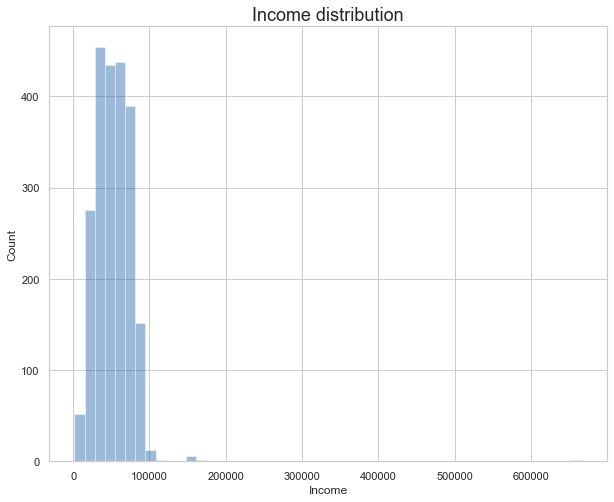

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(df.Income,kde=False,hist=True)
plt.title('Income distribution',size=18)
plt.ylabel('Count')

* The feature Income have 24 null values
* Finding: 

    - Most incomes are distributed between 0 - 100,000, with a few outliers
    - Will impute null values with median value, to avoid effects of outliers on imputation value

In [11]:
df.Income.std()

25173.0766609014

In [12]:
df.Income.mean()

52247.25135379061

<AxesSubplot:xlabel='Income'>

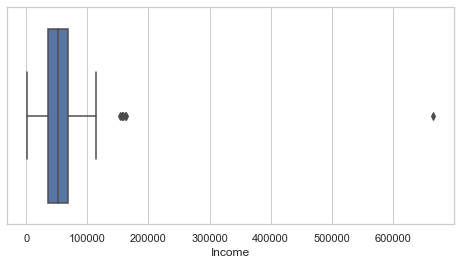

In [13]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")
sns.boxplot(df.Income)

* Impute null values in Income, using median value (to avoid skewing of the mean due to outliers):

In [14]:
df.Income=df.Income.fillna(df.Income.median())

In [15]:
df.Income.isnull().sum()

0

#### Outliers:
   * Identify features containing outliers
       
  

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [17]:
#Select columns to plot
df_to_plot=df.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',\
                            'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(exclude=np.object)

In [18]:
df_to_plot.shape

(2240, 16)

In [19]:
df_to_plot.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7


### Subplot

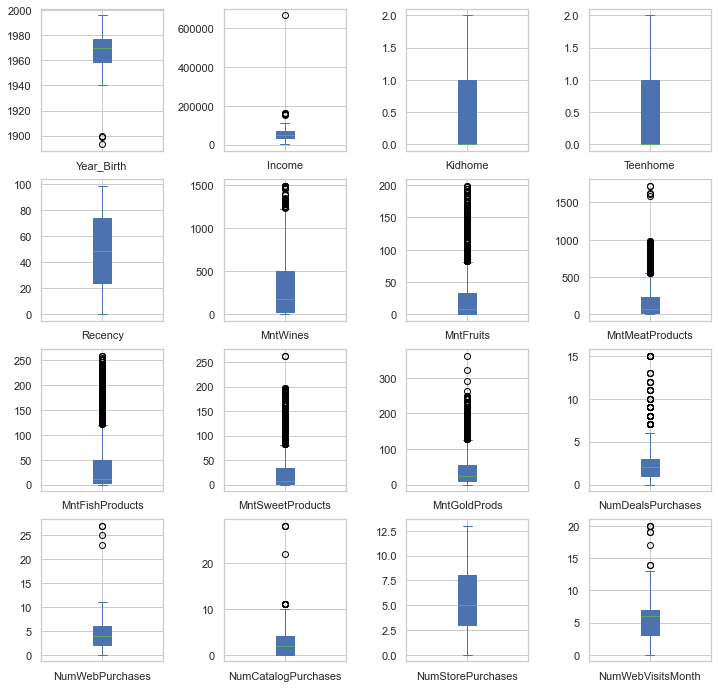

In [20]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,12), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

* Remove rows where Year_Birth <= 1900:

In [21]:
df=df[df['Year_Birth']>1900].reset_index(drop=True)

<AxesSubplot:>

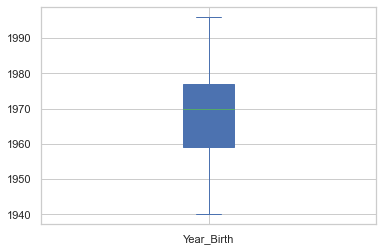

In [22]:
df['Year_Birth'].plot(kind='box', patch_artist=True)

### Are there any variables that warrant transformations?

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

* Findings: The Dt_Customer column should be transformed to datetime format
- Transform data type of Dt_Customer to datetime

In [24]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [25]:
df[['Dt_Customer']]

,Dt_Customer
0,2014-06-16
1,2014-06-15
2,2014-05-13
3,2014-05-11
4,2014-04-08
...,...
2232,2013-03-07
2233,2013-01-22
2234,2012-12-03
2235,2012-11-29


### Are there any useful variables that you can engineer with the given data?
* Review a list of the feature names below, from which we can engineer:
    * The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'
    * The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'
    * The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'
    * The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'
    * The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [26]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1880,2150,1958,PhD,Widow,80995.0,0,1,2013-05-11,83,860,28,409,73,56,56,1,8,9,4,4,0,0,0,0,0,0,0,CA
873,2098,1969,PhD,Married,33581.0,2,0,2013-01-08,38,11,0,5,0,0,1,1,1,0,2,8,0,0,0,0,0,0,0,SP
326,1650,1960,Master,Married,81843.0,0,0,2013-04-22,13,779,86,537,34,69,138,1,5,9,12,3,0,0,0,0,0,0,0,SP
1673,2262,1965,Master,Together,45143.0,0,1,2013-08-26,74,202,5,74,11,5,14,3,6,1,5,7,0,0,0,0,0,0,0,SA
2027,450,1958,Master,Together,42315.0,0,1,2013-07-12,90,67,15,80,17,11,80,3,1,4,4,3,0,0,0,0,0,0,0,US


In [27]:
df['Dependents']=df.Kidhome + df.Teenhome
#Year becoming a customer
df['Year_Customer'] =pd.DatetimeIndex(df['Dt_Customer']).year
#Total Amount Spent
mnt_cols=[col for col in df.columns if 'Mnt' in col]
df['TotalMnt']=df[mnt_cols].sum(axis=1)
#Total Purchases
purchases_cols=[col for col in df.columns if 'Purchases' in col]
df['TotalPurchases']=df[purchases_cols].sum(axis=1)
# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


### Do you notice any patterns or anomalies in the data? Can you plot them?

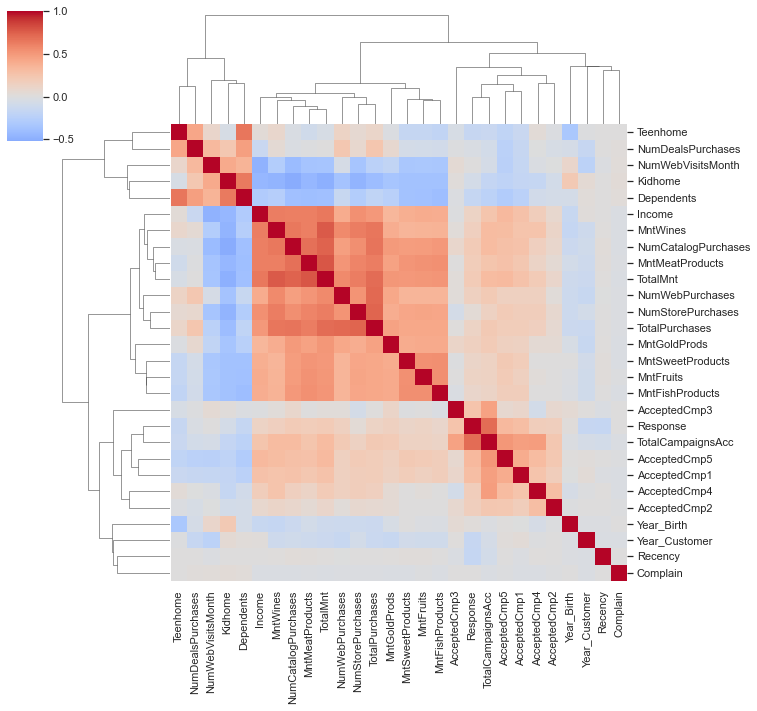

In [28]:
#Calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corrs=df.drop(columns='ID').select_dtypes(include=np.number).corr(method='kendall')
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);


* To identify patterns, we will first identify feature correlations. Positive correlations between features appear red, negative correlations appear blue, and no correlation appears grey in the clustered heatmap above.
* From this heatmap we can observe the following clusters of correlated features:
  * The "High Income" cluster:
    * Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are positively correlated with 'Income'
    * Purchasing in store, on the web, or via the catalog ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases') is positively correlated with 'Income'
* Plot illustrating the effect of high income on spending:
  * Note: For the purposes of this plot, limiting income to < 200000 to remove outlier

<AxesSubplot:xlabel='Income', ylabel='TotalMnt'>

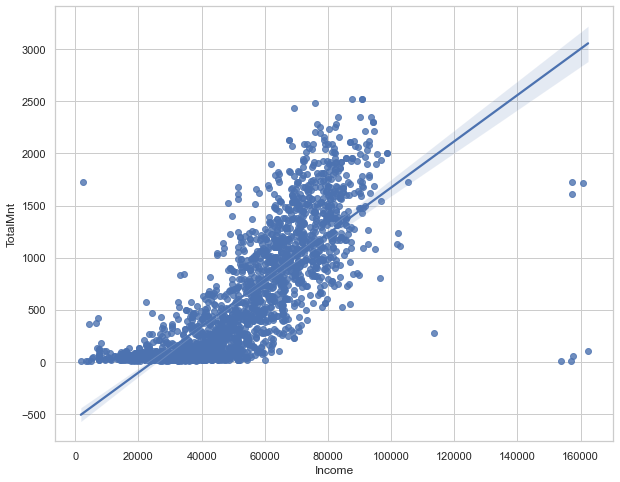

In [29]:
plt.figure(figsize=(10,8))
sns.regplot(x='Income', y='TotalMnt', data=df[df['Income'] < 200000])

* Plot illustrating negative effect of having dependents (kids & teens) on spending:


<AxesSubplot:xlabel='Dependents', ylabel='TotalMnt'>

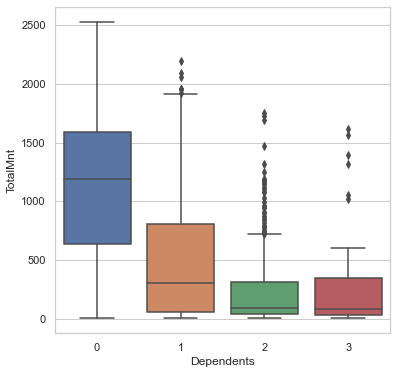

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Dependents',y='TotalMnt',data=df)

* Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased:

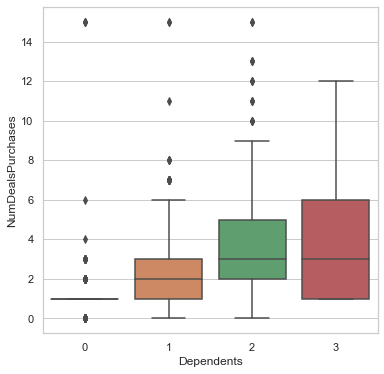

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df);

* Plots illustrating the positive effect of income and negative effect of having kids & teens on advertising campaign acceptance:
  * Note: For the purposes of the following plot, limiting income to < 200000 to remove outlier

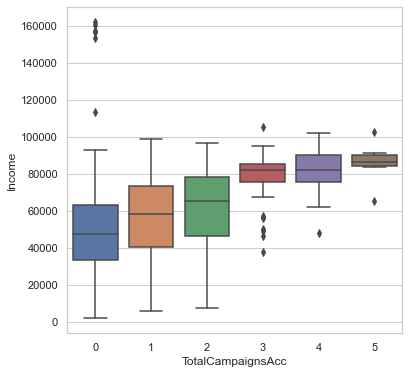

In [32]:
plt.figure(figsize=(6,6))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df[df['Income']<200000]);

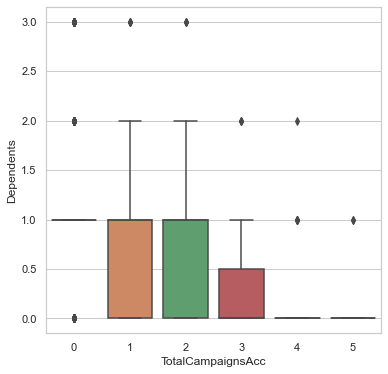

In [33]:
plt.figure(figsize=(6,6))
sns.boxplot(x='TotalCampaignsAcc', y='Dependents', data=df);

* Investigate anomaly:
  * Number of web visits in the last month is not positively correlated with number of web purchases
  * Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website

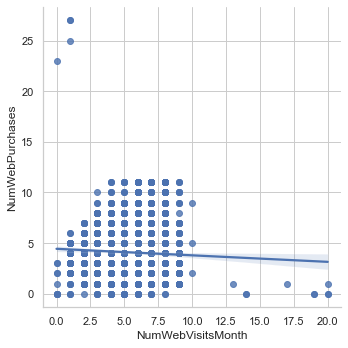

In [34]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);

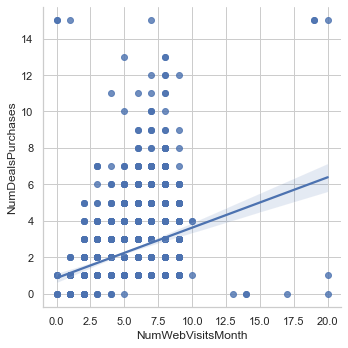

In [35]:
sns.lmplot(x='NumWebVisitsMonth',y='NumDealsPurchases',data=df)

## Section 02: Statistical Analysis
* Run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

#### What factors are significantly related to the number of store purchases?
We will use use a linear regression model with NumStorePurchases as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases

Begin by plotting the target variable:

Text(0.5, 1.0, 'NumStorePurchases distribution')

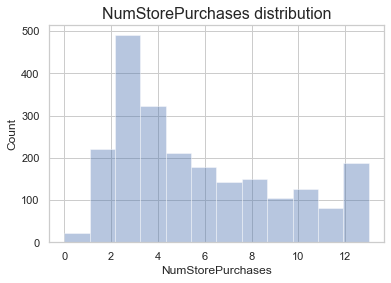

In [36]:
plt.figure(figsize=(6,4))
sns.distplot(df['NumStorePurchases'],kde=False,bins=12,hist=True)
plt.ylabel('Count')
plt.title('NumStorePurchases distribution', size=16)

In [37]:
# drop unique ID
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

* Drop uninformative features
  * ID is unique to each customer
  * Dt_Customer will be dropped in favor of using engineered variable Year_Customer
  * Perform one-hot encoding of categorical features, encoded data shown below:

In [38]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

In [39]:
# get categorical features and review number of unique values
cat=df.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

Number of unique values per categorical feature:
 Education         5
Marital_Status    8
Country           8
dtype: int64


In [40]:
# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

# merge with numeric data
num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,2014,1190,15,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2014,577,18,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,2014,251,11,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,2014,11,4,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2014,91,8,2


* Fit linear regression model to training data (70% of dataset)
  * Evaluate predictions on test data (30% of dataset) using RMSE:
  

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())  

Linear regression model RMSE:  1.306777117689693e-12
Median value of target variable:  5.0


* Findings: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions


* Identify features that significantly affect the number of store purchases, using permutation importance:
 

In [52]:
#!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=10)

Weight,Feature
11.9544 ± 1.0736,TotalPurchases
1.9621 ± 0.0445,NumCatalogPurchases
1.5157 ± 0.0982,NumWebPurchases
0.7951 ± 0.0392,NumDealsPurchases
0 ± 0.0000,Country_IND
0 ± 0.0000,Country_GER
0 ± 0.0000,Country_ME
0 ± 0.0000,TotalCampaignsAcc
0 ± 0.0000,Country_CA
0 ± 0.0000,Country_AUS


####  Significant features:
   * 'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases'
   * All other features are not significant
### Then Explore the directionality of these effects, using SHAP values:

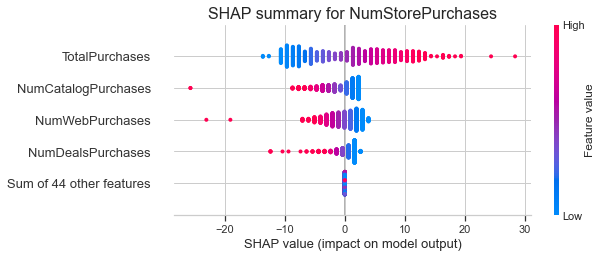

In [51]:
#!pip install shap 
import shap
# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

### Does US fare significantly better than the Rest of the World in terms of total purchases?
* Plot total number of purchases by country:

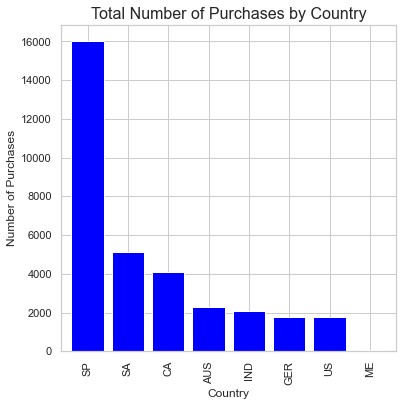

In [44]:
plt.figure(figsize=(6,6))
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar',width=0.8,align='center',color='blue')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

* Findings:
  * Spain (SP) has the highest number of purchases
  * US is second to last, therefore the US does not fare better than the rest of the world in terms of the total number of purchases

**Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test**


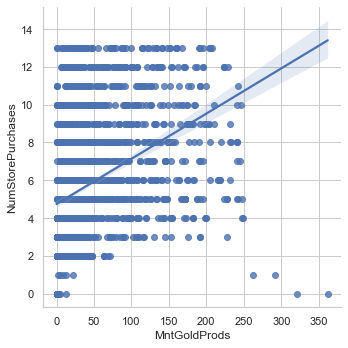

In [45]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data = df);

In [46]:
df[['MntGoldProds','NumStorePurchases']].corr()

,MntGoldProds,NumStorePurchases
MntGoldProds,1.000000,0.383264
NumStorePurchases,0.383264,1.000000


* Perform Kendall correlation analysis (non-parametric test since MntGoldProducts is not normally distributed and contains outliers):

In [47]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


* Finding:There is significant positive correlation between MntGoldProds and NumStorePurchases

In [48]:
kendall_corr

KendalltauResult(correlation=0.3927160395725131, pvalue=3.55881817905435e-152)

***Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?***
* We will compare MntFishProducts between Married PhD candidates and all other customers:

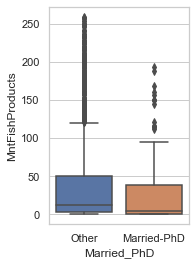

In [49]:
#sum the marital status and phd dummy variables - the Married+PhD group will have value of 2
df2['Married_PhD'] = df2['Marital_Status_Married'] + df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})
df2['Married_PhD'].unique()
# plot MntFishProducts between Married-PhD and others
plt.figure(figsize=(2.5,4))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df2);

* Findings: Married PhD candidates spend significantly less on fish products compared to other customers.

In [53]:
# independent t-test p-value
from scipy.stats import ttest_ind
pval = ttest_ind(df2[df2['Married_PhD'] == 'Married-PhD']['MntFishProducts'], df2[df2['Married_PhD'] == 'Other']['MntFishProducts']).pvalue
print("t-test p-value: ", round(pval, 4))

t-test p-value:  0.0053


In [54]:
# now drop the married-phD column created above, to include only the original variables in the analysis below\
df2.drop(columns='Married_PhD',inplace=True)

### What other factors are significantly related to amount spent on fish?
* Like with the analysis of NumStorePurchases above, we will use use a linear regression model with MntFishProducts as the target variable, and then use machine learning explainability techniques to get insights about which features predict the amount spent on fish
* Begin by plotting the target variable:

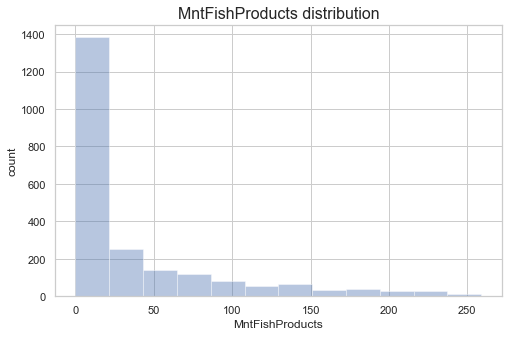

In [66]:
plt.figure(figsize=(8,5))
sns.distplot(df['MntFishProducts'], kde=False, hist=True, bins=12)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count');

* Fit linear regression model to training data (70% of dataset)
  * Evaluate predictions on test data (30% of dataset) using RMSE:
  

In [74]:
# isolate X and y variables, and perform train-test split
x=df2.drop(columns='MntFishProducts')
y=df2.MntFishProducts
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
# linear regression model
model=LinearRegression()
model.fit(x_train,y_train)
#Predict
preds=model.predict(x_test)
#Evaluate model using RMSE
print('Linear regression model RMSE:',np.sqrt(mean_squared_error(y_test,preds)))
print('Median of target variable:',y.median())

Linear regression model RMSE: 7.765038945922972e-13
Median of target variable: 12.0


* Finding: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions
#### Identify features that significantly affect the amount spent on fish, using permutation importance:


In [77]:
perm= PermutationImportance(model,random_state=1).fit(x_test,y_test)
eli5.show_weights(perm,feature_names=x_test.columns.tolist(),top=7)

* Significant features:
  * 'TotalMnt', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits'
  * All other features are not significant

#### Explore the directionality of these effects, using SHAP values:


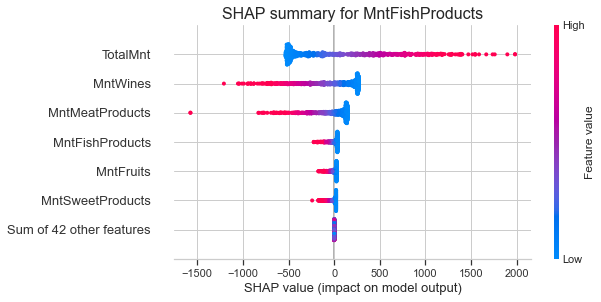

In [78]:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7);

* Findings:
  * The amount spent on fish increases with higher total amount spent ('TotalMnt')
  * The amount spent on fish decreases with higher amounts spent on wine, meat, gold, fruit, or sweets ('MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits')
* Interpretation:
  * Customers who spend the most on fish are those who spend less on other products (wine, meat, gold, fruit, and sweets)

### Is there a significant relationship between geographical regional and success of a campaign?
* Plot success of campaigns by region

In [80]:
!pip install plotly
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=fc913ef342b220aa76d7dc4fca5f411d0e32b3d0eead19cc476c8a5faec561b3
  Stored in directory: c:\users\ddtha\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [97]:
# convert country codes to correct nomenclature for choropleth plot
# the dataset doesn't provide information about country codes
## ...so I'm taking my best guess about the largest nations that make sense given the codes provided
df['Country_code'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

# success of campaigns by country code
df_cam = df[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

# rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

# choropleth plot
import plotly.express as px

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=3,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=1000,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

In [83]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

* Findings:
    * The campaign acceptance rates are low overall
    * The campaign with the highest overall acceptance rate is the most recent campaign (column name: Response)
    * The country with the highest acceptance rate in any campaign is Mexico
* Is the effect of region on campaign success statistically significant? See below. 

* Statistical summary of regional effects on campaign success:
  * Methodology: Performed logistic regression for Campaign Accepted by Country, reporting Chisq p-value for overall model.
  * Findings: The regional differences in advertising campaign success are statistically significant.

# Section 03: Data Visualization
#### Plot and visualize the answers to the below questions.

* Which marketing campaign is most successful?
  * Plot marketing campaign overall acceptance rates:


Text(0.5, 1.0, 'Marketing campaign success rate')

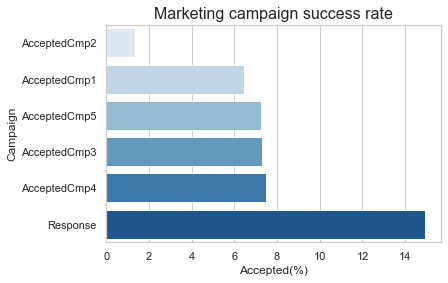

In [125]:
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()
cam_success.rename(columns={'index': 'Camp'}, inplace=True)
plt.figure(figsize=(6,4))
sns.barplot(x='Percent',y='Camp',data=cam_success.sort_values('Percent',ascending=True),palette='Blues')
plt.xlabel('Accepted(%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16)

Findings: The most successful campaign is the most recent (column name: Response)
### What does the average customer look like for this company?


In [128]:
# list of cols with binary responses
binary_cols=[col for col in df.columns if 'Accepted' in col]+['Response','Complain']
# list of cols for spending 
mnt_cols=[col for col in df.columns if 'Mnt' in col]
# list of cols for channels
channel_cols=[col for col in df.columns if 'Num' in col]+['TotalPurchases', 'TotalCampaignsAcc']

In [143]:
# average customer demographics
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

,Average
Year_Birth,1968.9
Year_Customer,2013.0
Income,52227.4
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


* Basic demographics: The average customer is...
    * Born in 1969
    * Became a customer in 2013
    * Has an income of roughly $52,000 per year
    * Has 1 dependent (roughly equally split between kids or teens)
    * Made a purchase from our company in the last 49 days

#### Which products are performing best?
* The average customer spent...
    * $$25-50 on Fruits, Sweets, Fish, or Gold products
    * Over $160 on Meat products
    * Over $300 on Wines
    * Over $600 total
* Products performing best:
* Wines
* Followed by meats

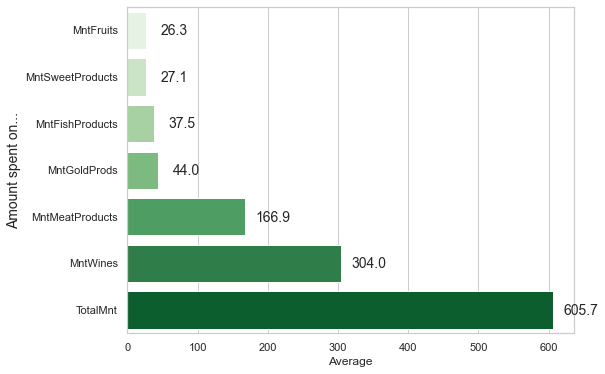

In [190]:
spending=pd.DataFrame(round(df[mnt_cols].mean(),1),columns=['Average']).sort_values(by='Average').reset_index()
# Plot bar chart
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Average', y='index', data=spending, palette='Greens')
plt.ylabel('Amount spent on...',size=14)
## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center",size=14) ;
#ax.grid(False)
#ax.set_xticks([])
#ax.set_yticks([])

### Which channels are underperforming?
* Channels: The average customer...
  * Accepted less than 1 advertising campaign
  * Made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 5 store purchases
  * Averaged 14 total purchases
  * Visited the website 5 times
* Underperforming channels:
   * Advertising campaigns
   * Followed by deals, and catalog

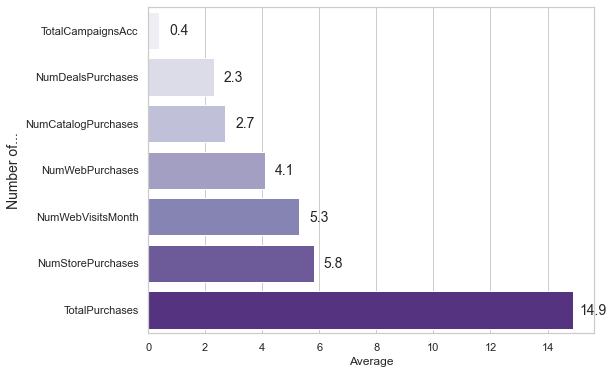

In [186]:
channels=pd.DataFrame(round(df[channel_cols].mean(),1),columns=['Average']).sort_values(by='Average').reset_index()
# Plot bar chart
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Average', y='index', data=channels, palette='Purples')
plt.ylabel('Number of...',size=14)
## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.7,
            y=p.get_y()+0.5,
            s=q,
            ha="center",size=14) ;

# Conclusion
**Recall the overall goal:**
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions...

**Summary of actionable findings to improve advertising campaign success:**
* The most successful advertising campaign was the most recent campaign (column name: Response), and was particularly successful in Mexico (>60% acceptance rate!)
  * Suggested action: Conduct future advertising campaigns using the same model recently implemented in Mexico.
* Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens
  * Suggested action: Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens
* The most successful products are wines and meats (i.e. the average customer spent the most on these items)
  * Focus advertising campaigns on boosting sales of the less popular items
* The underperforming channels are deals and catalog purchases (i.e. the average customer made the fewest purchases via these channels)
* The best performing channels are web and store purchases (i.e. the average customer made the most purchases via these channels)
  * Suggested action: Focus advertising campaigns on the more successful channels, to reach more customers